In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

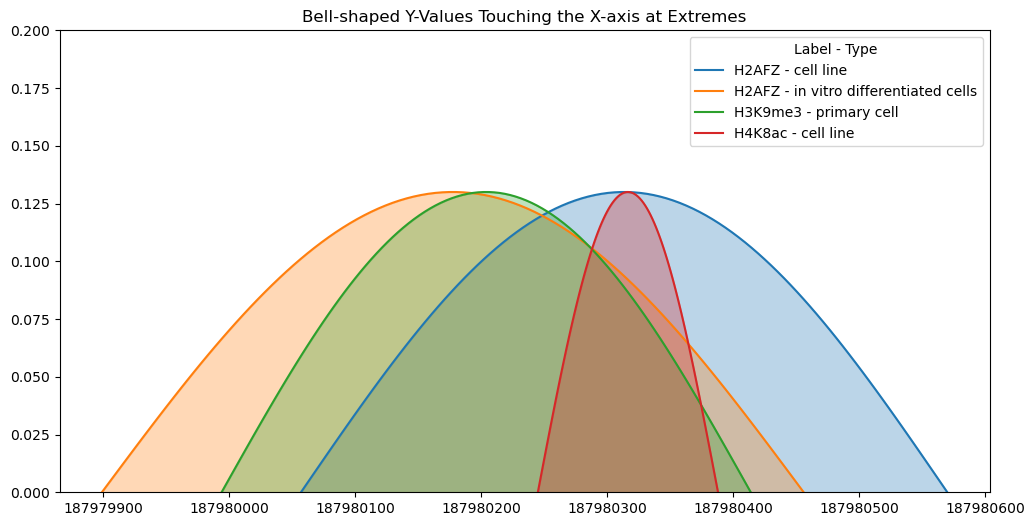

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'start': [187980057, 187979899, 187979994, 187980245],
    'end': [187980570, 187980456, 187980414, 187980388],
    'label': ['H2AFZ', 'H2AFZ', 'H3K9me3', 'H4K8ac'],
    'type': ['cell line', 'in vitro differentiated cells', 'primary cell', 'cell line']
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Combine label and type
df['combined_label'] = df['label'] + ' - ' + df['type']

# Generate x and y values
x_vals = []
y_vals = []
combined_labels = []

for i, row in df.iterrows():
    x_range = np.linspace(row['start'], row['end'], 100)  # Create 100 points for smoothness
    midpoint = (row['end'] + row['start']) / 2
    half_width = (row['end'] - row['start']) / 2

    # Generate bell-shaped y-values using sine function
    y_range = np.sin(np.pi * (x_range - row['start']) / (2 * half_width))*0.13

    x_vals.extend(x_range)
    y_vals.extend(y_range)
    combined_labels.extend([row['combined_label']] * len(x_range))

plot_df = pd.DataFrame({
    'x': x_vals,
    'y': y_vals,
    'combined_label': combined_labels
})

# Set default color palette
palette = sns.color_palette("tab10", n_colors=len(plot_df['combined_label'].unique()))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
for idx, label in enumerate(plot_df['combined_label'].unique()):
    subset = plot_df[plot_df['combined_label'] == label]
    color = palette[idx]
    ax.plot(subset['x'], subset['y'], label=label, color=color)
    ax.fill_between(subset['x'], subset['y'], color=color, alpha=0.3)  # Fill the area with a transparent color of the line color

# Format x-axis ticks to display the entire number
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_useOffset(False)

ax.set_ylim(0, 0.13+0.07)
# Position the legend in the top right corner of the plot
ax.legend(title='Label - Type', loc='upper right')
plt.title("Bell-shaped Y-Values Touching the X-axis at Extremes")

plt.show()